# Laboratorio Numero 3

## Fase Desenvuelta

#### En este punto del laboratorio se pide implementar un programa genérico para poder representar la respuesta en frecuencia de un sistema arbitrario, con la fase desenvuelta, al estilo de lo mostrado en la siguiente figura:

<div style="text-align: center;">
  <img src="fig3.png" alt="Gráfico de Fase Desenvuelta para el filtro de la Figura 2." width="50%">
</div>

#### La cual, representa el gráfico de Fase Desenvuelta para de un filtro Chebyshev II, que tiene una Respuesta en frecuencia así:
<div style="text-align: center;">
  <img src="fig2.png" alt="Respuesta en frecuencia de un filtro Chebyshev II." width="50%">
</div>

#### El programa debe recibir como entrada el conjunto de coeficientes que representan la función de transferencia del sistema (bk y ak en la Ecuación ) y mostrar un gráfico de Amplitud y  ángulo con la fase desenvuelta.

#### Recordadndo que:

#### la función de transferencia de cierto sistema $$LTI (H(z))$$, puede representarse de varias maneras alternativas, tal y como se ilustra en la siguiente ecuación.

$$ H(z) = \frac{\sum_{k=0}^{M} b_k \cdot z^{-k}}{\sum_{k=0}^{N} a_k \cdot z^{-k}} = \frac{\prod_{k=1}^{M} (1 - c_k \cdot z^{-1})}{\prod_{k=1}^{N} (1 - p_k \cdot z^{-1})} $$

#### Donde ck y pk corresponden a los ceros y a los polos del sistema respectivamente. 
#### Así, la respuesta en frecuencia del sistema genérico de la anterior ecuación, se puede calcular como:
$$H(f) = H(z) \bigg|_{z=e^{j \cdot 2 \pi \cdot f}}$$

# Filtro Chebyshev II.

#### Se ha diseñado un filtro paso-bajo Chebyshev de tipo II con las siguientes características:

#### -Orden: 8
#### -Atenuación mínima en la banda de rechazo: 10 dB
#### -Frecuencias de corte normalizadas: 0.35
#### Usando la librería scipy.signal de Python.



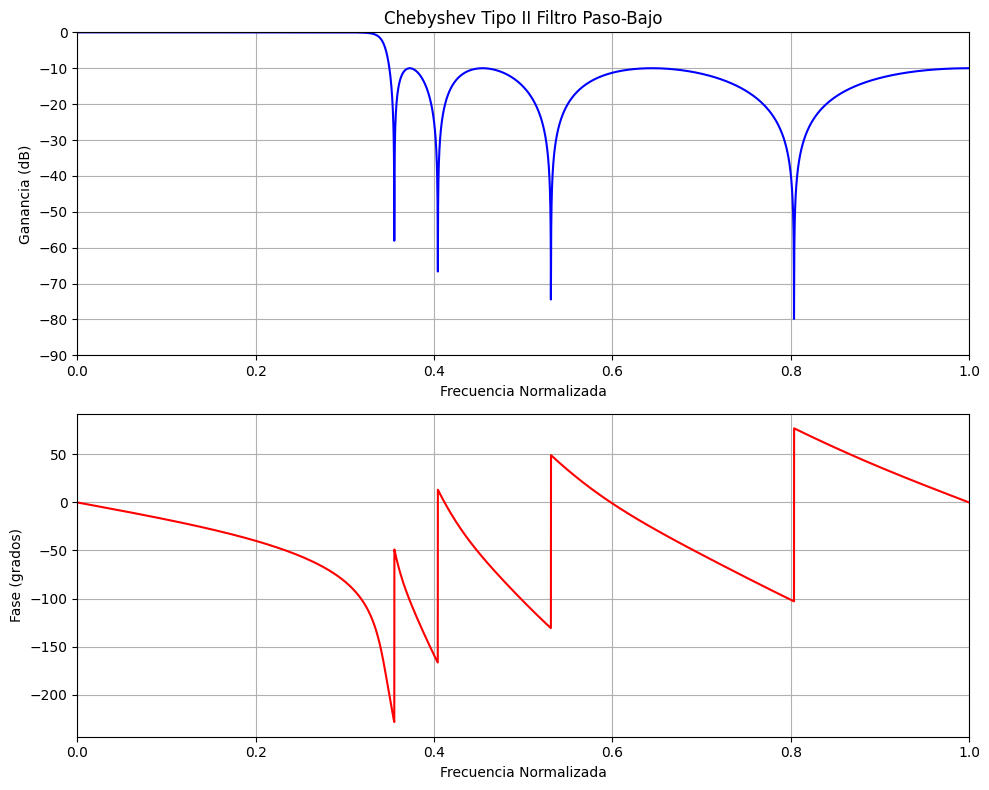

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby2, freqz

# Parámetros del filtro
N = 8  # Orden del filtro
fc = 0.35 # Frecuencia de corte (frecuencia normalizada)
rs = 10  # Atenuación mínima en la banda de parada en dB

# Diseño del filtro Chebyshev tipo II
b, a = cheby2(N, rs, fc, btype='low', analog=False)

# Frecuencia de respuesta
w, h = freqz(b, a, worN=8000)

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la magnitud de la respuesta en frecuencia
ax1.plot(w / np.pi, 20 * np.log10(np.abs(h)), 'b')
ax1.set_title('Chebyshev Tipo II Filtro Paso-Bajo')
ax1.set_xlabel('Frecuencia Normalizada')
ax1.set_ylabel('Ganancia (dB)')
ax1.grid()
ax1.set_xlim([0, 1])
ax1.set_ylim([-90, 0])

# Graficar la fase de la respuesta en frecuencia en grados
angles = np.unwrap(np.angle(h))
degrees = np.degrees(angles)
ax2.plot(w / np.pi, degrees, 'r')
ax2.set_xlabel('Frecuencia Normalizada')
ax2.set_ylabel('Fase (grados)')
ax2.grid()
ax2.set_xlim([0, 1])

# Mostrar las gráficas
plt.tight_layout()
plt.show()


## Expresar la función de transferencia generalizada en terminos de H(z)

In [42]:
import numpy as np
from scipy.signal import cheby2

# Parámetros del filtro
N = 8  # Orden del filtro
fc = 0.35  # Frecuencia de corte (frecuencia normalizada)
rs = 10  # Atenuación mínima en la banda de parada en dB

# Diseño del filtro Chebyshev tipo II
b, a = cheby2(N, rs, fc, btype='low', analog=False)

# Mostrar los coeficientes
numerator_coeffs = b
denominator_coeffs = a

numerator = " + ".join(f"{b[i]:.4f} * z^{{-{i}}}" for i in range(len(b)))
denominator = " + ".join(f"{a[i]:.4f} * z^{{-{i}}}" for i in range(len(a)))

Hz = f"H(z) = ({numerator}) / ({denominator})"
Hz, numerator_coeffs, denominator_coeffs


('H(z) = (0.3044 * z^{-0} + 0.1091 * z^{-1} + 0.6556 * z^{-2} + 0.4734 * z^{-3} + 0.7528 * z^{-4} + 0.4734 * z^{-5} + 0.6556 * z^{-6} + 0.1091 * z^{-7} + 0.3044 * z^{-8}) / (1.0000 * z^{-0} + -0.6644 * z^{-1} + 1.8220 * z^{-2} + -0.2156 * z^{-3} + 1.0269 * z^{-4} + 0.2919 * z^{-5} + 0.3609 * z^{-6} + 0.1232 * z^{-7} + 0.0930 * z^{-8})',
 array([0.30438098, 0.10909378, 0.65558736, 0.47342885, 0.75281913,
        0.47342885, 0.65558736, 0.10909378, 0.30438098]),
 array([ 1.        , -0.66442838,  1.82197151, -0.21560437,  1.02693401,
         0.29185104,  0.36093474,  0.12318257,  0.09295995]))

#### La función de transferencia (H(z)) para el filtro Chebyshev tipo II de 8º orden con una frecuencia de corte de 0.35 y una atenuación mínima en la banda de parada de 10 dB se expresa como:

$$[ H(z) = \frac{{b_0 + b_1z^{-1} + b_2z^{-2} + \ldots + b_8z^{-8}}}{{1 + a_1z^{-1} + a_2z^{-2} + \ldots + a_8z^{-8}}} ]$$

#### Donde los coeficientes son:

#### Coeficientes del numerador ((b)): [ b = [0.3044, 0.1091, 0.6556, 0.4734, 0.7528, 0.4734, 0.6556, 0.1091, 0.3044] ]
#### Coeficientes del denominador ((a)): [ a = [1.0000, -0.6644, 1.8220, -0.2156, 1.0269, 0.2919, 0.3609, 0.1232, 0.0930] ]

$$[ H(z) = \frac{0.3044z^0 + 0.1091z^{-1} + 0.6556z^{-2} + 0.4734z^{-3} + 0.7528z^{-4} + 0.4734z^{-5} + 0.6556z^{-6} + 0.1091z^{-7} + 0.3044z{-8}}{1.0000z0 - 0.6644z^{-1} + 1.8220z^{-2} - 0.2156z^{-3} + 1.0269z^{-4} + 0.2919z^{-5} + 0.3609z^{-6} + 0.1232z^{-7} + 0.0930z^{-8}} ]$$

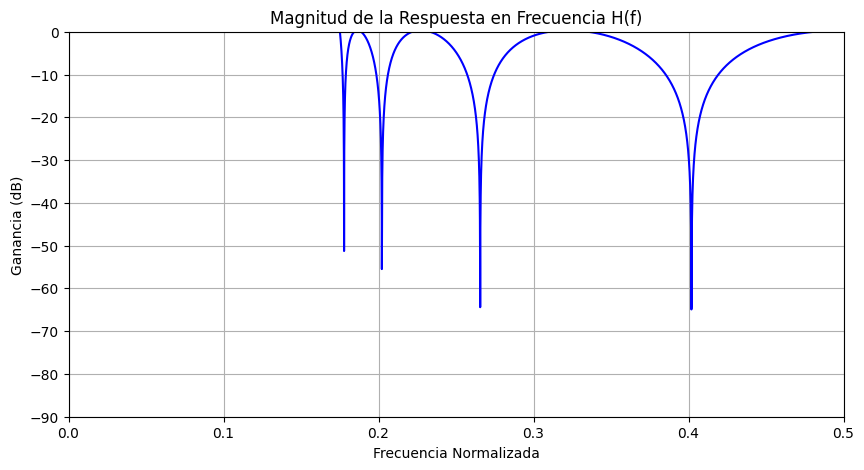

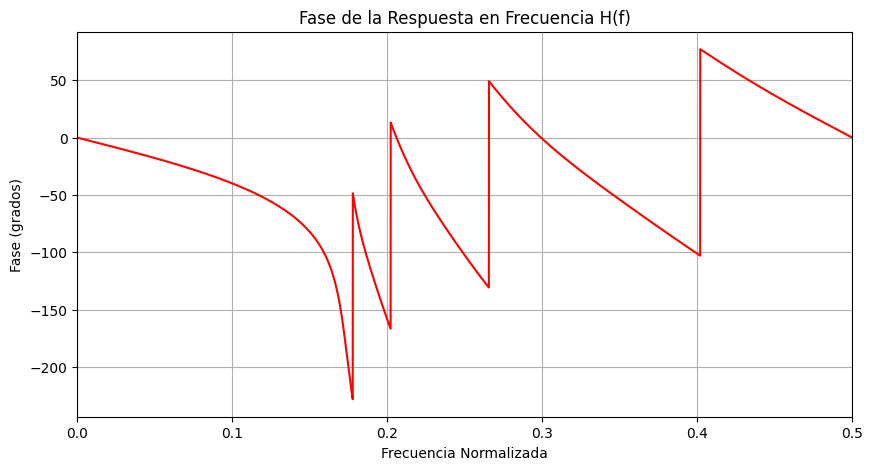

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby2, tf2zpk

# Parámetros del filtro
N = 8  # Orden del filtro
fc = 0.35  # Frecuencia de corte (frecuencia normalizada)
rs = 10  # Atenuación mínima en la banda de parada en dB

# Diseño del filtro Chebyshev tipo II
b, a = cheby2(N, rs, fc, btype='low', analog=False)

# Encontrar ceros y polos
zeros, poles, _ = tf2zpk(b, a)

# Rango de frecuencias
f = np.linspace(0, 0.5, 8000)  # Frecuencia normalizada de 0 a 0.5 (Nyquist)

# Evaluar H(f) en z = e^(j2πf)
z = np.exp(1j * 2 * np.pi * f)

# Calcular la respuesta en frecuencia H(f)
numerator = np.prod([1 - zero * z**-1 for zero in zeros], axis=0)
denominator = np.prod([1 - pole * z**-1 for pole in poles], axis=0)
Hf = numerator / denominator

# Graficar la magnitud de la respuesta en frecuencia
plt.figure(figsize=(10, 5))
plt.plot(f, 20 * np.log10(np.abs(Hf)), 'b')
plt.title('Magnitud de la Respuesta en Frecuencia H(f)')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.xlim([0, 0.5])
plt.ylim([-90, 0])
plt.show()

# Graficar la fase de la respuesta en frecuencia en grados
angles = np.unwrap(np.angle(Hf))
degrees = np.degrees(angles)
plt.figure(figsize=(10, 5))
plt.plot(f, degrees, 'r')
plt.title('Fase de la Respuesta en Frecuencia H(f)')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Fase (grados)')
plt.grid()
plt.xlim([0, 0.5])
plt.show()


# Fase desenvuelta para el filtro Chebyshev tipo II

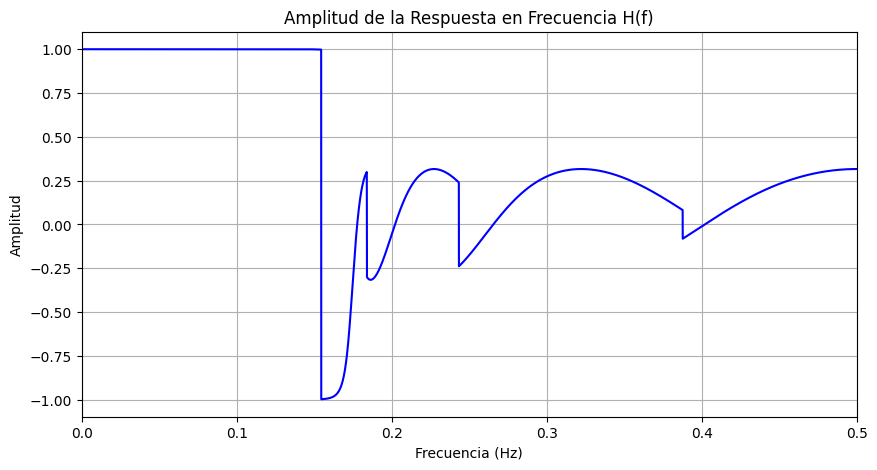

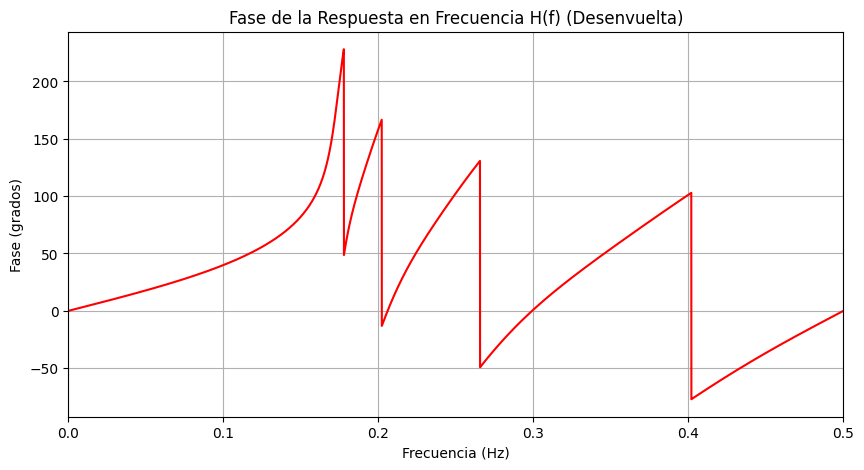

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby2, freqz

# Parámetros del filtro
N = 8  # Orden del filtro
fc = 0.35  # Frecuencia de corte (frecuencia normalizada)
rs = 10  # Atenuación mínima en la banda de parada en dB

# Diseño del filtro Chebyshev tipo II
b, a = cheby2(N, rs, fc, btype='low', analog=False)

# Rango de frecuencias
f = np.linspace(0, 0.5, 8000)  # Frecuencia de 0 a 0.5 (Nyquist)

# Evaluar H(f) en z = e^(j2πf)
z = np.exp(1j * 2 * np.pi * f)

# Calcular la respuesta en frecuencia H(f) usando la ecuación de suma
numerator = np.polyval(b, z**-1)
denominator = np.polyval(a, z**-1)
Hf = numerator / denominator

# Desenvolver la fase manualmente para evitar discontinuidades
phase = np.angle(Hf)
unwrapped_phase = np.zeros_like(phase)
unwrapped_phase[0] = phase[0]

for i in range(1, len(phase)):
    delta = phase[i] - phase[i - 1]
    if delta > np.pi:
        phase[i:] -= 2 * np.pi
    elif delta < -np.pi:
        phase[i:] += 2 * np.pi
    unwrapped_phase[i] = phase[i]

# Ajustar la amplitud para admitir valores negativos
amplitude = np.abs(Hf) * np.sign(np.real(Hf))  # Amplitud real, permitiendo negativos

# Graficar la amplitud de la respuesta en frecuencia
plt.figure(figsize=(10, 5))
plt.plot(f, amplitude, 'b')
plt.title('Amplitud de la Respuesta en Frecuencia H(f)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.xlim([0, 0.5])
plt.show()

# Graficar la fase de la respuesta en frecuencia en grados (desenvuelta)
degrees = np.degrees(unwrapped_phase)
plt.figure(figsize=(10, 5))
plt.plot(f, degrees, 'r')
plt.title('Fase de la Respuesta en Frecuencia H(f) (Desenvuelta)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (grados)')
plt.grid()
plt.xlim([0, 0.5])
plt.show()


# Metodolodía propuesta

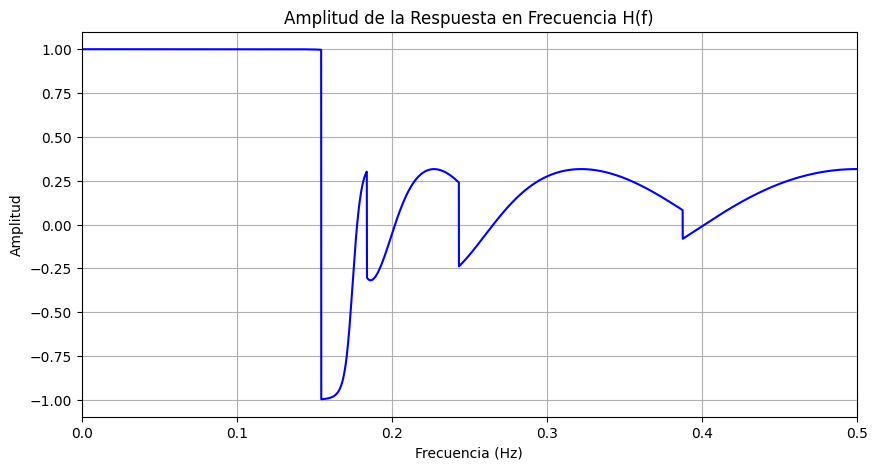

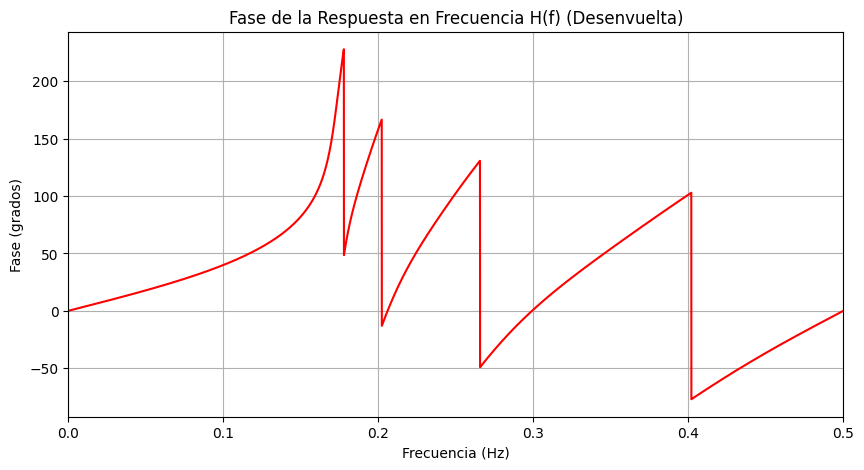

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_response(b, a):
    # Rango de frecuencias
    f = np.linspace(0, 0.5, 8000)  # Frecuencia de 0 a 0.5 (Nyquist)

    # Evaluar H(f) en z = e^(j2πf)
    z = np.exp(1j * 2 * np.pi * f)

    # Calcular la respuesta en frecuencia H(f) usando la ecuación de suma
    numerator = np.polyval(b, z**-1)
    denominator = np.polyval(a, z**-1)
    Hf = numerator / denominator

    # Desenvolver la fase manualmente para evitar discontinuidades
    phase = np.angle(Hf)
    unwrapped_phase = np.zeros_like(phase)
    unwrapped_phase[0] = phase[0]

    for i in range(1, len(phase)):
        delta = phase[i] - phase[i - 1]
        if delta > np.pi:
            phase[i:] -= 2 * np.pi
        elif delta < -np.pi:
            phase[i:] += 2 * np.pi
        unwrapped_phase[i] = phase[i]

    # Ajustar la amplitud para admitir valores negativos
    amplitude = np.abs(Hf) * np.sign(np.real(Hf))  # Amplitud real, permitiendo negativos

    # Graficar la amplitud de la respuesta en frecuencia
    plt.figure(figsize=(10, 5))
    plt.plot(f, amplitude, 'b')
    plt.title('Amplitud de la Respuesta en Frecuencia H(f)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.xlim([0, 0.5])
    plt.show()

    # Graficar la fase de la respuesta en frecuencia en grados (desenvuelta)
    degrees = np.degrees(unwrapped_phase)
    plt.figure(figsize=(10, 5))
    plt.plot(f, degrees, 'r')
    plt.title('Fase de la Respuesta en Frecuencia H(f) (Desenvuelta)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Fase (grados)')
    plt.grid()
    plt.xlim([0, 0.5])
    plt.show()

# Ejemplo de uso
b = [0.3044, 0.1091, 0.6556, 0.4734, 0.7528, 0.4734, 0.6556, 0.1091, 0.3044]
a = [1.0000, -0.6644, 1.8220, -0.2156, 1.0269, 0.2919, 0.3609, 0.1232, 0.0930]

plot_frequency_response(b, a)


# 😎

Coeficientes del numerador (b): [0.00097035 0.00776278 0.02716974 0.05433949 0.06792436 0.05433949
 0.02716974 0.00776278 0.00097035]
Coeficientes del denominador (a): [ 1.00000000e+00 -2.38697983e+00  3.36960116e+00 -2.96409892e+00
  1.79747431e+00 -7.38048925e-01  2.00473711e-01 -3.23942876e-02
  2.38186806e-03]


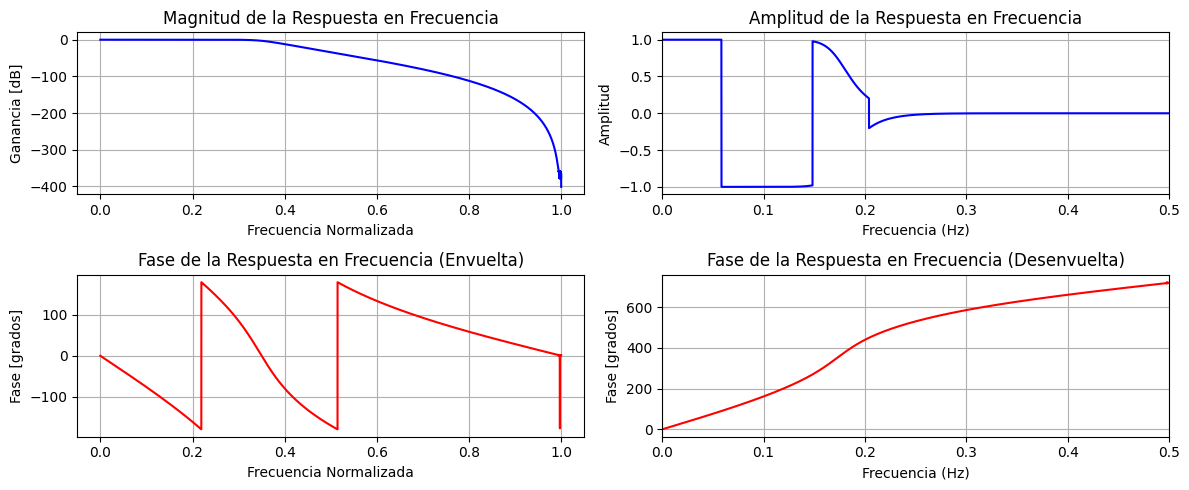

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.signal import butter, cheby1, cheby2, ellip, freqz

def plot_frequency_response(b, a):
    # Rango de frecuencias
    f = np.linspace(0, 0.5, 8000)  # Frecuencia de 0 a 0.5 (Nyquist)

    # Evaluar H(f) en z = e^(j2πf)
    z = np.exp(1j * 2 * np.pi * f)

    # Calcular la respuesta en frecuencia H(f) usando la ecuación de suma
    numerator = np.polyval(b, z**-1)
    denominator = np.polyval(a, z**-1)
    Hf = numerator / denominator

    # Desenvuelver la fase manualmente para evitar discontinuidades
    phase = np.angle(Hf)
    unwrapped_phase = np.zeros_like(phase)
    unwrapped_phase[0] = phase[0]

    for i in range(1, len(phase)):
        delta = phase[i] - phase[i - 1]
        if delta > np.pi:
            phase[i:] -= 2 * np.pi
        elif delta < -np.pi:
            phase[i:] += 2 * np.pi
        unwrapped_phase[i] = phase[i]

    # Ajustar la amplitud para admitir valores negativos
    amplitude = np.abs(Hf) * np.sign(np.real(Hf))  # Amplitud real, permitiendo negativos

    # Graficar la respuesta en frecuencia (magnitud en dB y fase en grados)
    w, h = freqz(b, a, worN=8000)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 5))

    # Gráfico de magnitud en dB
    axs[0, 0].plot(w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    axs[0, 0].set_title('Magnitud de la Respuesta en Frecuencia')
    axs[0, 0].set_xlabel('Frecuencia Normalizada')
    axs[0, 0].set_ylabel('Ganancia [dB]')
    axs[0, 0].grid()

    # Gráfico de fase envuelta en grados
    axs[1, 0].plot(w / np.pi, np.degrees(np.angle(h)), 'r')
    axs[1, 0].set_title('Fase de la Respuesta en Frecuencia (Envuelta)')
    axs[1, 0].set_xlabel('Frecuencia Normalizada')
    axs[1, 0].set_ylabel('Fase [grados]')
    axs[1, 0].grid()

    # Gráfico de amplitud real
    axs[0, 1].plot(f, amplitude, 'b')
    axs[0, 1].set_title('Amplitud de la Respuesta en Frecuencia')
    axs[0, 1].set_xlabel('Frecuencia (Hz)')
    axs[0, 1].set_ylabel('Amplitud')
    axs[0, 1].grid()
    axs[0, 1].set_xlim([0, 0.5])

    # Gráfico de fase desenvuelta
    degrees = np.degrees(unwrapped_phase)
    axs[1, 1].plot(f, degrees, 'r')
    axs[1, 1].set_title('Fase de la Respuesta en Frecuencia (Desenvuelta)')
    axs[1, 1].set_xlabel('Frecuencia (Hz)')
    axs[1, 1].set_ylabel('Fase [grados]')
    axs[1, 1].grid()
    axs[1, 1].set_xlim([0, 0.5])

    plt.tight_layout()
    plt.show()

def main():
    # Leer parámetros desde un archivo JSON
    with open('filtro_parametros.json', 'r') as file:
        params = json.load(file)

    filter_type = params["tipo_filtro"]
    N = params["orden"]
    fc = params["fc"]
    
    if filter_type == "Butterworth":
        b, a = butter(N, fc, btype='low', analog=False)
    elif filter_type == "Chebyshev Tipo I":
        rp = params["rp"]
        b, a = cheby1(N, rp, fc, btype='low', analog=False)
    elif filter_type == "Chebyshev Tipo II":
        rs = params["rs"]
        b, a = cheby2(N, rs, fc, btype='low', analog=False)
    elif filter_type == "Elíptico":
        rp = params["rp"]
        rs = params["rs"]
        b, a = ellip(N, rp, rs, fc, btype='low', analog=False)
    else:
        print("Tipo de filtro no válido")
        return

    # Imprimir coeficientes
    print("Coeficientes del numerador (b):", b)
    print("Coeficientes del denominador (a):", a)

    # Graficar la respuesta en frecuencia y la fase desenvuelta
    plot_frequency_response(b, a)

if __name__ == "__main__":
    main()
